In [ ]:
from google.colab import drive
import tarfile
from time import time
from shutil import copyfile
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import random
import pandas as pd
import os
import plotly.express as px
import skimage
import cv2
import imageio
import pathlib
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset creation

In [ ]:
import os
import re
import pandas as pd
from PIL import Image

folder_path = "/content/drive/MyDrive/foto_crop/"

images = []
labels = []
file_paths = []

name_pattern = re.compile(r'^crop_(.+?)(?:\d+|_face_\d+)?\.\w+$')

for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
        file_path = os.path.join(folder_path, filename)
        print(file_path)

        img = Image.open(file_path)

        images.append(img)

        match = name_pattern.match(filename)
        if match:
            label = re.sub(r'(\d+|_face_\d+)', '', match.group(1)).strip().replace('_', ' ')
            labels.append(label)
        else:
            labels.append("Undefined")

        file_paths.append(file_path)

df = pd.DataFrame({'Image': file_paths, 'Label': labels})


/content/drive/MyDrive/foto_crop/crop_Marco1_881.jpg
/content/drive/MyDrive/foto_crop/crop_Marco1_895.jpg
/content/drive/MyDrive/foto_crop/crop_Marco1_498.jpg
/content/drive/MyDrive/foto_crop/crop_Marco1_16.jpg
/content/drive/MyDrive/foto_crop/crop_Marco1_467.jpg
/content/drive/MyDrive/foto_crop/crop_Marco1_301.jpg
/content/drive/MyDrive/foto_crop/crop_Marco1_315.jpg
/content/drive/MyDrive/foto_crop/crop_Marco1_329.jpg
/content/drive/MyDrive/foto_crop/crop_Marco1_328.jpg
/content/drive/MyDrive/foto_crop/crop_Marco1_314.jpg
/content/drive/MyDrive/foto_crop/crop_Marco1_472.jpg
/content/drive/MyDrive/foto_crop/crop_Marco1_466.jpg
/content/drive/MyDrive/foto_crop/crop_Marco1_300.jpg
/content/drive/MyDrive/foto_crop/crop_Marco1_17.jpg
/content/drive/MyDrive/foto_crop/crop_Marco1_499.jpg
/content/drive/MyDrive/foto_crop/crop_Marco1_894.jpg
/content/drive/MyDrive/foto_crop/crop_Marco1_880.jpg
/content/drive/MyDrive/foto_crop/crop_Marco1_658.jpg
/content/drive/MyDrive/foto_crop/crop_Marco1_670

In [ ]:
df

,Image,Label
0,/content/drive/MyDrive/foto_crop/crop_Marco1_8...,Marco
1,/content/drive/MyDrive/foto_crop/crop_Marco1_8...,Marco
2,/content/drive/MyDrive/foto_crop/crop_Marco1_4...,Marco
3,/content/drive/MyDrive/foto_crop/crop_Marco1_1...,Marco
4,/content/drive/MyDrive/foto_crop/crop_Marco1_4...,Marco
...,...,...
1856,/content/drive/MyDrive/foto_crop/crop_Marco1_1...,Marco
1857,/content/drive/MyDrive/foto_crop/crop_Marco1_6...,Marco
1858,/content/drive/MyDrive/foto_crop/crop_Marco1_6...,Marco
1859,/content/drive/MyDrive/foto_crop/crop_Marco1_1...,Marco


In [ ]:
import os
import re
import pandas as pd
from PIL import Image

folder_path = "/content/drive/MyDrive/foto_crop/faces"

images = []
labels = []
file_paths = []

name_pattern = re.compile(r'^(.+?)(?:\d+|_face_\d+)?\.\w+$')

for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
        file_path = os.path.join(folder_path, filename)

        img = Image.open(file_path)

        images.append(img)

        match = name_pattern.match(filename)
        if match:
            label = "Salvatore" if "Salvatore" in match.group(1) else match.group(1).strip().replace('_', ' ')
            labels.append(label)
        else:
            labels.append("Undefined")
        file_paths.append(file_path)

df1 = pd.DataFrame({'Image': file_paths, 'Label': labels})

In [ ]:
df1

,Image,Label
0,/content/drive/MyDrive/foto_crop/faces/crop_Sa...,Salvatore
1,/content/drive/MyDrive/foto_crop/faces/crop_Sa...,Salvatore
2,/content/drive/MyDrive/foto_crop/faces/crop_Sa...,Salvatore
3,/content/drive/MyDrive/foto_crop/faces/crop_Sa...,Salvatore
4,/content/drive/MyDrive/foto_crop/faces/crop_Sa...,Salvatore
...,...,...
1973,/content/drive/MyDrive/foto_crop/faces/crop_Sa...,Salvatore
1974,/content/drive/MyDrive/foto_crop/faces/crop_Sa...,Salvatore
1975,/content/drive/MyDrive/foto_crop/faces/crop_Sa...,Salvatore
1976,/content/drive/MyDrive/foto_crop/faces/crop_Sa...,Salvatore


In [ ]:
df = pd.concat([df, df1], ignore_index=True)

In [ ]:
df

,Image,Label
0,/content/drive/MyDrive/foto_crop/crop_Marco1_8...,Marco
1,/content/drive/MyDrive/foto_crop/crop_Marco1_8...,Marco
2,/content/drive/MyDrive/foto_crop/crop_Marco1_4...,Marco
3,/content/drive/MyDrive/foto_crop/crop_Marco1_1...,Marco
4,/content/drive/MyDrive/foto_crop/crop_Marco1_4...,Marco
...,...,...
3834,/content/drive/MyDrive/foto_crop/faces/crop_Sa...,Salvatore
3835,/content/drive/MyDrive/foto_crop/faces/crop_Sa...,Salvatore
3836,/content/drive/MyDrive/foto_crop/faces/crop_Sa...,Salvatore
3837,/content/drive/MyDrive/foto_crop/faces/crop_Sa...,Salvatore


In [ ]:
import os
import re
import random
import pandas as pd
from PIL import Image

main_folder_path = "/content/drive/MyDrive/Vips/"

num_random_photos = 1850

images = []
labels = []
file_paths = []

name_pattern = re.compile(r'^(.+?)(?:\d+|_face_\d+)?\.\w+$')

for root, dirs, files in os.walk(main_folder_path):
    for filename in files:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
            file_path = os.path.join(root, filename)
            print(file_path)

            img = Image.open(file_path)

            images.append(img)

            labels.append("Unknown")

            file_paths.append(file_path)

selected_files = random.sample(list(zip(images, labels, file_paths)), min(num_random_photos, len(images)))

selected_file_paths = [file_path for _, _, file_path in selected_files]

df1 = pd.DataFrame({'Image': selected_file_paths, 'Label': ["Unknown"] * len(selected_file_paths)})


Output streaming troncato alle ultime 5000 righe.
/content/drive/MyDrive/Vips/Bobby_Brown/Millie Bobby Brown43_3909_face_0.jpg
/content/drive/MyDrive/Vips/Bobby_Brown/Millie Bobby Brown45_3910_face_0.jpg
/content/drive/MyDrive/Vips/Bobby_Brown/Millie Bobby Brown46_3911_face_0.jpg
/content/drive/MyDrive/Vips/Bobby_Brown/Millie Bobby Brown47_3912_face_0.jpg
/content/drive/MyDrive/Vips/Bobby_Brown/Millie Bobby Brown48_3913_face_0.jpg
/content/drive/MyDrive/Vips/Bobby_Brown/Millie Bobby Brown49_3914_face_0.jpg
/content/drive/MyDrive/Vips/Bobby_Brown/Millie Bobby Brown4_3904_face_0.jpg
/content/drive/MyDrive/Vips/Bobby_Brown/Millie Bobby Brown50_3916_face_0.jpg
/content/drive/MyDrive/Vips/Bobby_Brown/Millie Bobby Brown51_3917_face_0.jpg
/content/drive/MyDrive/Vips/Bobby_Brown/Millie Bobby Brown52_3918_face_0.jpg
/content/drive/MyDrive/Vips/Bobby_Brown/Millie Bobby Brown55_3919_face_0.jpg
/content/drive/MyDrive/Vips/Bobby_Brown/Millie Bobby Brown58_3920_face_0.jpg
/content/drive/MyDrive/Vips

In [ ]:
df1

,Image,Label
0,/content/drive/MyDrive/Vips/Brenton_Thwaites/B...,Unknown
1,/content/drive/MyDrive/Vips/Jessica_Barden/Jes...,Unknown
2,/content/drive/MyDrive/Vips/Jeremy_Renner/Jere...,Unknown
3,/content/drive/MyDrive/Vips/Avril_Lavigne/Avri...,Unknown
4,/content/drive/MyDrive/Vips/Chris_Hemsworth/Ch...,Unknown
...,...,...
1845,/content/drive/MyDrive/Vips/Inbar_Lavi/Inbar L...,Unknown
1846,/content/drive/MyDrive/Vips/Patrick_Harris/Nei...,Unknown
1847,/content/drive/MyDrive/Vips/Alex_Lawther/Alex ...,Unknown
1848,/content/drive/MyDrive/Vips/amber_heard/amber ...,Unknown


In [ ]:
df = pd.concat([df, df1], ignore_index=True)

In [ ]:
df

,Image,Label
0,/content/drive/MyDrive/foto_crop/crop_Marco1_8...,Marco
1,/content/drive/MyDrive/foto_crop/crop_Marco1_8...,Marco
2,/content/drive/MyDrive/foto_crop/crop_Marco1_4...,Marco
3,/content/drive/MyDrive/foto_crop/crop_Marco1_1...,Marco
4,/content/drive/MyDrive/foto_crop/crop_Marco1_4...,Marco
...,...,...
5684,/content/drive/MyDrive/Vips/Inbar_Lavi/Inbar L...,Unknown
5685,/content/drive/MyDrive/Vips/Patrick_Harris/Nei...,Unknown
5686,/content/drive/MyDrive/Vips/Alex_Lawther/Alex ...,Unknown
5687,/content/drive/MyDrive/Vips/amber_heard/amber ...,Unknown


In [92]:
df.to_csv("/content/drive/MyDrive/data_final.csv", index=False)

In [ ]:
len(df['Label'].unique())

3

In [75]:
def count_labels(df):
    label_counts = df.groupby('Label').size()
    label_counts.plot(kind='bar')
    plt.xlabel('Label')
    plt.ylabel('Number of elements')
    plt.title('Labels Count')
    plt.show()

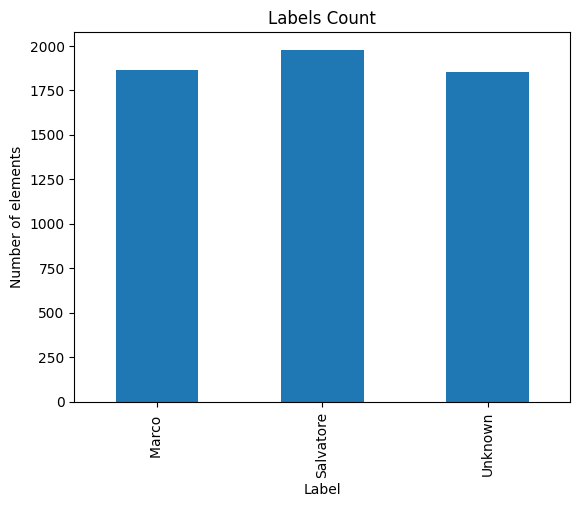

In [76]:
count_labels(df)

# Train/Test/Validation Split

In [77]:
from sklearn.model_selection import train_test_split

train_df, test_val_df = train_test_split(df, test_size=0.3, stratify=df['Label'], random_state=42)

test_df, val_df = train_test_split(test_val_df, test_size=0.5, stratify=test_val_df['Label'], random_state=42)


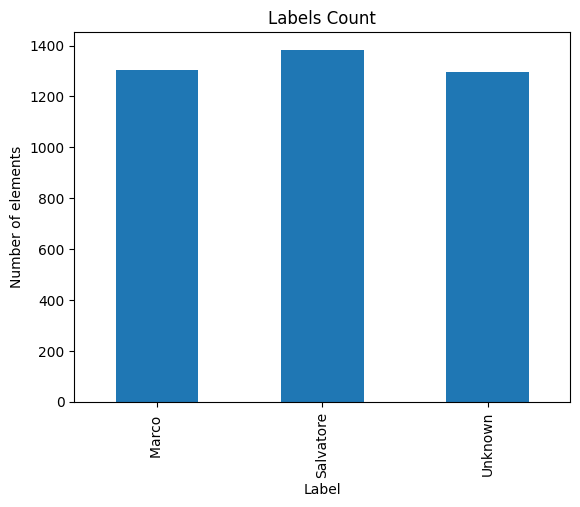

In [78]:
count_labels(train_df)

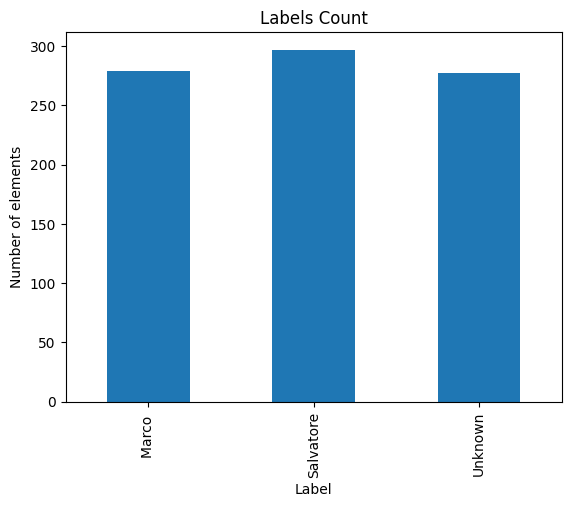

In [79]:
count_labels(test_df)

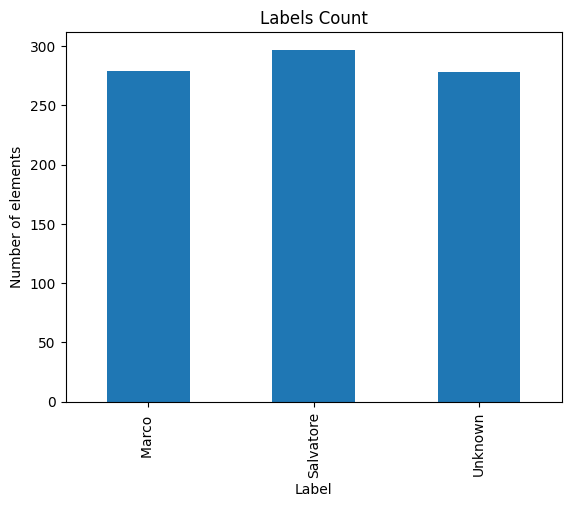

In [80]:
count_labels(val_df)

In [ ]:
train_df['Label'].unique()

array(['Salvatore', 'Unknown', 'Marco '], dtype=object)

In [ ]:
test_df['Label'].unique()

array(['Salvatore', 'Marco ', 'Unknown'], dtype=object)

In [ ]:
val_df['Label'].unique()

array(['Salvatore', 'Marco ', 'Unknown'], dtype=object)

# Data Augmentation

In [ ]:
def datagen(image_dims, batch_size, train_df, valid_df, test_df):

  datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.,horizontal_flip= True,rotation_range= 15,brightness_range=(0.9, 1.1), zoom_range=[1-0.1, 1+0.1])
  train_gen=datagen.flow_from_dataframe(
                                              dataframe=train_df,
                                              directory=None,
                                              x_col="Image",
                                              y_col="Label",
                                              batch_size=batch_size,
                                              shuffle=True,
                                              class_mode="categorical",
                                              target_size=image_dims)

  valid_gen=datagen.flow_from_dataframe(
                                              dataframe=val_df,
                                              x_col="Image",
                                              y_col="Label",
                                              batch_size=batch_size,
                                              shuffle=True,
                                              class_mode="categorical",
                                              target_size=image_dims)
  # no augmentation per il test set
  datagen_test=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
  test_gen=datagen_test.flow_from_dataframe(
                                              dataframe=test_df,
                                              x_col="Image",
                                              y_col="Label",
                                              batch_size=batch_size,
                                              shuffle=False,
                                              class_mode="categorical",
                                              target_size=image_dims)
  return train_gen, valid_gen, test_gen

In [91]:
image_dims = (224,224)
batch_s = 32
train_data, val_data, test_data = datagen(image_dims, batch_s, train_df, val_df, test_df )

Found 3982 validated image filenames belonging to 3 classes.
Found 854 validated image filenames belonging to 3 classes.
Found 853 validated image filenames belonging to 3 classes.


# InceptionResNetV2

In [ ]:
from keras.models import Model
from keras.layers import Flatten, Dense
import keras.losses
from keras.applications.inception_resnet_v2 import InceptionResNetV2 as IncRes

In [ ]:
base_model = IncRes(input_shape=(256,256,3),weights='imagenet',include_top=False)
for layer in base_model.layers:
    layer.trainable=False

X=Flatten()(base_model.output)
X = Dropout(0.5)(X)
X=Dense(3, activation='softmax')(X)

model_IncRes = Model(base_model.input, X)

model_IncRes.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

219055592/219055592 [==============================] - 4s 0us/step


In [ ]:
model_IncRes.save_weights('base_weights_model')

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpointer=ModelCheckpoint(filepath="/content/drive/MyDrive/models/incres.hdf5", verbose=1, save_best_only= True)

In [ ]:
his_IncRes = model_IncRes.fit(train_data, epochs= 20, validation_data= val_data, steps_per_epoch= 10, callbacks=[checkpointer])

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 1.9307 - accuracy: 0.6589
Epoch 1: val_loss improved from inf to 1.53696, saving model to /content/drive/MyDrive/models/incres.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 66s 5s/step - loss: 1.9307 - accuracy: 0.6589 - val_loss: 1.5370 - val_accuracy: 0.7974
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: 0.5510 - accuracy: 0.9094
Epoch 2: val_loss improved from 1.53696 to 0.86397, saving model to /content/drive/MyDrive/models/incres.hdf5
10/10 [==============================] - 41s 4s/step - loss: 0.5510 - accuracy: 0.9094 - val_loss: 0.8640 - val_accuracy: 0.8899
Epoch 3/20
10/10 [==============================] - ETA: 0s - loss: 0.4225 - accuracy: 0.9469
Epoch 3: val_loss improved from 0.86397 to 0.35387, saving model to /content/drive/MyDrive/models/incres.hdf5
10/10 [==============================] - 37s 4s/step - loss: 0.4225 - accuracy: 0.9469 - val_loss: 0.3539 - val_accuracy: 0.9578
Epoch 4/20
10/10 [==============================] - ETA: 0s - loss: 0.2915 - accuracy: 0.9563
Epoch 4: val_loss improved from 0.35387 to 0.24458, saving model to /content/drive/MyDrive/models/incres.hdf5
E

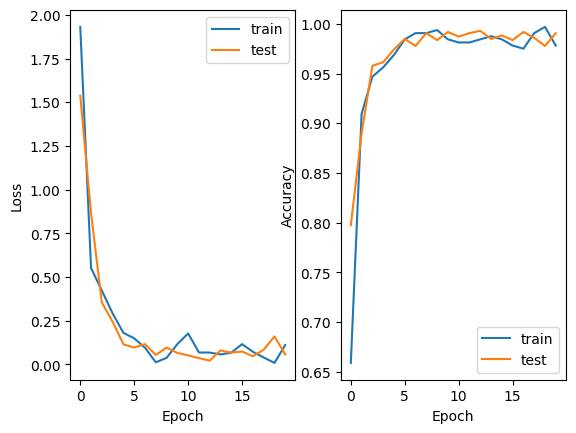

In [ ]:
# Loss
plt.subplot(1, 2, 1)
plt.plot(his_IncRes.history['loss'])
plt.plot(his_IncRes.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
# Accuracy
plt.subplot(1, 2, 2)
plt.plot(his_IncRes.history['accuracy'])
plt.plot(his_IncRes.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])

# VGGFace

In [56]:
!pip uninstall keras
!pip install keras==2.12

Found existing installation: keras 2.15.0
Uninstalling keras-2.15.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/keras-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/keras/*
Proceed (Y/n)? Y
  Successfully uninstalled keras-2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [57]:
! pip install git+https://github.com/rcmalli/keras-vggface.git
! pip install keras_applications --no-deps
filename = "/usr/local/lib/python3.10/dist-packages/keras_vggface/models.py"
text = open(filename).read()
open(filename, "w+").write(text.replace('keras.engine.topology', 'tensorflow.keras.utils'))

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-8s4xlj0j
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-8s4xlj0j
  Resolved https://github.com/rcmalli/keras-vggface.git to commit bee35376e76e35d00aeec503f2f242611a97b38a
  Preparing metadata (setup.py) ... done
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8295 sha256=665ac80415d1de340fa1187633cc1957dcd34e1f2ab19d4ae510248c75042d59
  Stored in directory: /tmp/pip-ephem-wheel-cache-072owtun/wheels/62/cd/e0/3a2d2fe84d014324aed54d420cab52df65a774d9b296c63996
Successfully built keras-vggface
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.3 MB/s eta 0:00:00


20952

In [58]:
import tensorflow as tf
from keras_vggface.vggface import VGGFace
from keras_vggface import utils
from keras.models import Model

In [60]:
vgg_model = VGGFace(include_top=False, input_shape=(224, 224, 3))
inputs = vgg_model.input

for layer in vgg_model.layers:
  layer.trainable = False

last_layer = vgg_model.get_layer('pool5').output
x = Flatten()(last_layer)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(3, activation='softmax')(x)

model = Model(inputs=inputs,outputs=outputs)

58909280/58909280 [==============================] - 0s 0us/step


In [61]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [62]:
model.save_weights('base_weights_model')

In [63]:
from keras.callbacks import ModelCheckpoint
checkpointer=ModelCheckpoint(filepath="/content/drive/MyDrive/models/vggface.hdf5", verbose=1, save_best_only= True)

In [64]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_counts = np.bincount(train_data.classes)
class_weights = len(train_data.classes) / (len(np.unique(train_data.classes)) * class_counts)

class_weight_dict = dict(enumerate(class_weights))

history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data,
    steps_per_epoch=10,
    callbacks=[checkpointer],
    class_weight=class_weight_dict
)


<ipython-input-64-5d1c809fc2c6>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.3256 - accuracy: 0.8562
Epoch 1: val_loss improved from inf to 0.10139, saving model to /content/drive/MyDrive/models/vggface.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 39s 3s/step - loss: 0.3256 - accuracy: 0.8562 - val_loss: 0.1014 - val_accuracy: 0.9637
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 0.0474 - accuracy: 0.9812
Epoch 2: val_loss improved from 0.10139 to 0.03938, saving model to /content/drive/MyDrive/models/vggface.hdf5
10/10 [==============================] - 34s 4s/step - loss: 0.0474 - accuracy: 0.9812 - val_loss: 0.0394 - val_accuracy: 0.9836
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9812
Epoch 3: val_loss did not improve from 0.03938
10/10 [==============================] - 30s 3s/step - loss: 0.0449 - accuracy: 0.9812 - val_loss: 0.0580 - val_accuracy: 0.9836
Epoch 4/10
10/10 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 0.9937
Epoch 4: val_loss improved from 0.03938 to 0.01874, saving model to /content/drive/MyDrive/models/vggface.hdf5
10/10 [==============================] - 34s 4s/step - loss: 0

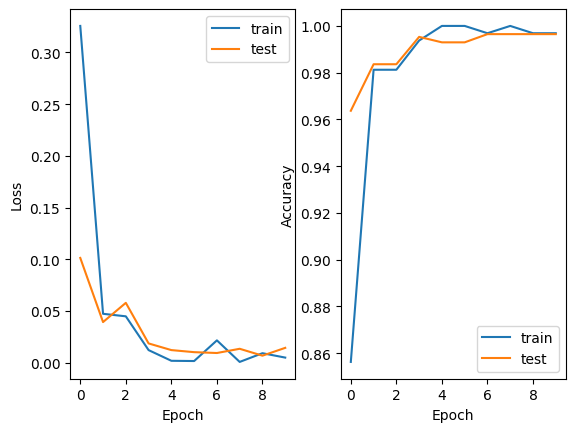

In [65]:
# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])

# Prediction

In [66]:
net = keras.models.load_model("/content/drive/MyDrive/models/vggface.hdf5")

In [69]:
preds = net.predict(test_data)
y_pred = np.argmax(preds, axis=1)

27/27 [==============================] - 7s 248ms/step


              precision    recall  f1-score   support

      Marco        0.99      1.00      1.00       279
   Salvatore       1.00      0.99      1.00       297
     Unknown       1.00      1.00      1.00       277

    accuracy                           1.00       853
   macro avg       1.00      1.00      1.00       853
weighted avg       1.00      1.00      1.00       853

[[279   0   0]
 [  2 295   0]
 [  0   0 277]]


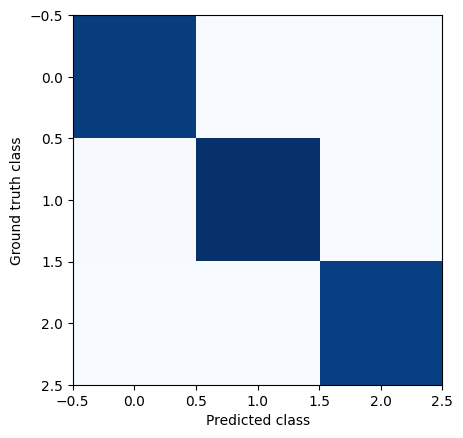

In [70]:
g_dict = test_data.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_data.classes, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel('Predicted class')
plt.ylabel('Ground truth class')

# Classification report
print(classification_report(test_data.classes, y_pred, target_names= classes))
print(cm)